La ecuacion de Klein-Gordon (la cual las componentes del espinor de dirac cumplen) en una espacio 1D-1T toma la forma: 

<h1><center>$(-\hbar^2c^2\frac{d^2}{d x^2}+m^2c^4)\psi=-\hbar^2\frac{\partial^2\psi}{\partial t^2}$</center></h1>

<div style="text-align: justify"> Asumiendo que la funcion de onda $\psi$ puede expresarse como el producto de una funcion de onda espacial $\psi_e$ y una funcion de onda temporal $\psi_t$ se puede demostrar que en presencia de un potencial arbitrario $U(\overrightarrow{r})$ la ecuacion de Klein-Gordon independiente del tiempo viene dada por:  </div>

<h1><center>$(E-U(\overrightarrow{r}))^2\psi_e=(m^2c^4-c^2\hbar^2\frac{d^2}{d x^2})\psi_e$</center></h1>

Donde tomando unidades naturales donde $\hbar=c=1$ y solucionando para la segunda derivada de la funcion de onda se tiene que: 

<h1><center>$\frac{d^2\psi_e}{d x^2}=[m^2-(E-U(\overrightarrow{r}))^2]\psi_e$</center></h1>


<p style='text-align: justify;'> Esta estructura es muy conveniente puesto que a partir de unas suposiciones iniciales de la funcion de onda y de su primera derivada podemos calcular punto a punto el valor de la funcion de onda por medio del metodo de shooting.

In [74]:
import numpy as np
import matplotlib.pyplot as plt

#FUNCIONES

def psi_dosPrima(x,psi,epsilon, potencial):

  return (m_electron**2-(epsilon-potencial)**2)*psi

def graficacion(x_vector,psi_vector,epsilon):

  plt.plot(x_vector, psi_vector, linewidth=2)
  plt.xlabel('x (m)')
  plt.ylabel('\u03a8')
  plt.grid(True)
  plt.show()

def calculo(epsilon, potencial):

  #Fronteras
  potencial = potencial
  x_Min = 0 #Punto inicial de la barrera de potencial (Definida en 0 (el origen) por facilidad)
  x_Max = L #Longitud de la barrera de potencial

  #Condiciones del metodo 

  global numero_puntos 
  numero_puntos = 1000 #Numero de puntos para iterar en el metodo.
  delta_x = (x_Max-x_Min)/numero_puntos # Tamaño del paso entre puntos 
  global x_vector
  x_vector = np.linspace(x_Min,x_Max,numero_puntos) #Array con las coordenadas en x. Sirve para graficar al final.

  #PREDICCIONES!!!

  psi = 0  #Naturalmente la funcion de onda debe ser cero en la frontera izquierda de la barrera (x = 0).
  psi_prima = 1 #Suponemos que la derivada de la funcion de onda es igual a 1 en la frontera izquierda de la barrera 
  global psi_vector
  psi_vector = np.zeros(numero_puntos) #Array con el valor de la funcion de onda

  #Aplicamos metodo de Euler para solucionar el sistema de ED

  for i in range(len(x_vector)):
      psi_vector[i] = psi #Guardamos el valor previo de la funcion de onda 
      psi_prima = psi_prima + psi_dosPrima(x_vector[i],psi,epsilon, potencial)*delta_x #Actualizamos el valor de la derivada (Metodo de Euler)
      psi = psi + psi_prima*delta_x #Actualizamos el valor de la funcion de onda (Metodo de Euler)
      
  #Normalizacion 

  c_normalizacion = np.sum(psi_vector**2)*delta_x #Calculamos cuanto debe ser la constante de normalizacion para nuestra funcion de onda.
  psi_vector = psi_vector/np.sqrt(c_normalizacion) #Normalizamos la funcion de onda

  #Return 

  valor = psi_vector[numero_puntos-1] #Regreso el valor en la posicion final para comparar su signo y buscar la raiz. 
  return valor


Auto energia:  3.144424438476562e-10 Joules (J)


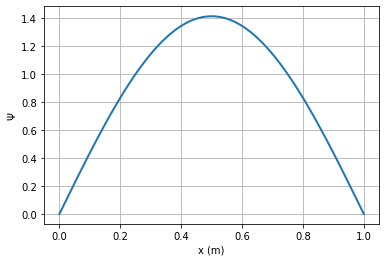

In [75]:
# Consideramos unidades naturales donde h_barra = c = 1

#Constantes: 

h_barra = 1
c = 1 
m_electron = 0.5110e-3 #Masa en Gigaelectronvoltios (GeV)

#Condiciones del problema 

Potencial = 10e3*m_electron #Potencial dentro de la region de confinamiento 
L = 1  #Longitud de la region de confinamiento 

#INTERVALO DE BUSQUEDA. Definimos entre que valores de energia el metodo de shooting buscara uno de los autovalores de la ED

control = 0 #Variable de control para iterar la busqueda 
epsilon_Min = 0 #Energia minima de busqueda 
epsilon_Max = 5  #Energia maxima de busqueda 

'''La funcion de onda debe ser cero en la frontera, garantizaremos esto por medio de la tolerancia del problema. El metodo de shooting
sera exitoso siempre que la funcion de onda evaluada en la frontera sea menor a la tolerancia impuesta
'''
tolerancia = 1e-5 

#Utilizamos el metodo de biseccion para encontrar el valor de Energia que satisface la ecuacion diferencial.

valor_1 = calculo(epsilon_Min, Potencial)
valor_2 = calculo(epsilon_Max, Potencial)

if valor_1 * valor_2 < 0 : 

  while control == 0 :
    
    valor_1 = calculo(epsilon_Min, Potencial)
    valor_2 = calculo(epsilon_Max, Potencial)
    epsilon_nuevo = (epsilon_Max+epsilon_Min)/2
    #print("epsilon_nuevo ", epsilon_nuevo)
    valor_3 = calculo(epsilon_nuevo, Potencial)
    #print("valor_3 ", valor_3)
    #Utilice las lineas comentadas para ver como evoluciona el valor de energia (epsilon) y el valor de la funcion de onda en la frontera derecha (valor_3)

    if abs(valor_3) < tolerancia :
      #print("\nEpsilon Final: ", epsilon_nuevo, "GeV")
      Energia = epsilon_nuevo*(1.6e-10) #Conversion de GeV a J 
      print("\nAuto energia: ", Energia, "Joules (J)")
      break 

    if valor_3 * valor_1 < 0 : 
      epsilon_Max = epsilon_nuevo
    elif valor_3 * valor_2 < 0 : 
      epsilon_Min = epsilon_nuevo
  graficacion(x_vector,psi_vector,epsilon_nuevo) #Graficamos la funcion de onda.

elif valor_1 * valor_2 > 0 : #Si es el caso no hay una solucion en el intervalo de busqueda 
  print("No se ha encontrado cambio de signo en el intervalo.")

Asumiendo entonces que la parte temporal de la ecuacion de Klein-Gordon viene dada por: 

<h1><center>$ \psi_t=\mathrm{e}^{i[\overrightarrow{P}\cdot\overrightarrow{r}-Et]}$ </center></h1>

Entonces la funcion de onda total es: 


<h1><center>$ \psi=\psi_t\cdot\psi_e$</center></h1>



Partiendo de la definicion de densidad de probabilidad:


<h1><center>$ \rho=\frac{1}{2mi}(\psi\frac{\partial \psi^\ast}{\partial t}-\psi^\ast\frac{\partial \psi}{\partial t})$</center></h1>

Es facil demostras que: 
<h1><center>$ \rho=\frac{\psi_e^2E}{m}$</center></h1>

Donde $m$ y $E$ son la masa del electron y la auto energia del sistema respectivamente. Con lo cual finalmente la densidad de probabilidad es: 

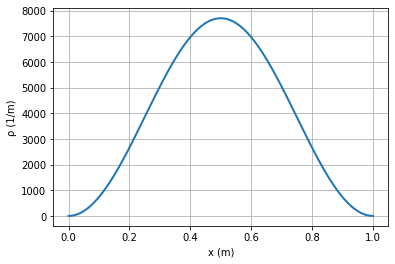

In [76]:
densidad = (psi_vector**2*epsilon_nuevo)/m_electron
plt.plot(x_vector, densidad, linewidth=2)
plt.xlabel('x (m)')
plt.ylabel('\u03C1 (1/m)')
plt.grid(True)
plt.show()

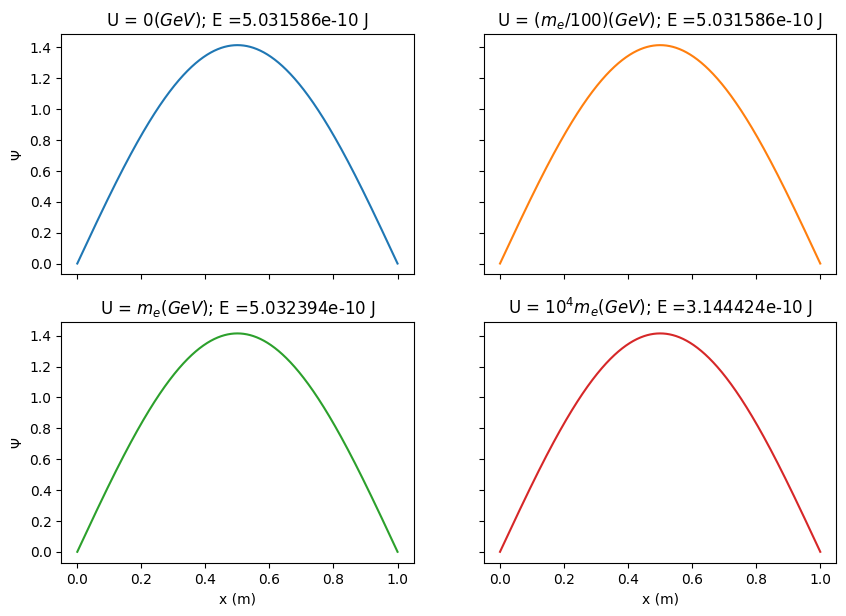

In [71]:
#GRAFICAS 

epsilon = np.array([3.1447410583496094,3.1447410583496094,3.1452465057373047,1.9652652740478516]) #En GeV. Vector con los valores de epsilon para cada potencial.
Potenciales = np.array([0, m_electron/100,m_electron, 10e3*m_electron]) #Vector con los valores de los potenciales. 
energias_joules = epsilon*(1.6e-10) #Convertimos de GeV a Julios 
Energias_cientificas = np.zeros(4) #Creamos un vector que contendra las energias en Jouls y expresadas en notacion cientifica. 

for i in range (0,4,1):
  Energias_cientificas[i]= "{:.6e}".format(energias_joules[i])

#FUNCIONES DE ONDA. Calculamos la funcion de onda para cada uno de los potenciales y con su respectivo epsilon (la auto "energia" que cumple la ED)

variable = calculo(epsilon[0],Potenciales[0]) #Debemos invocar nuestra funcion de calculo para calcular cada una de las funciones de onda.
psi_1 = psi_vector
variable = calculo(epsilon[1],Potenciales[1])
psi_2 = psi_vector
variable = calculo(epsilon[2],Potenciales[2])
psi_3 = psi_vector
variable = calculo(epsilon[3],Potenciales[3])
psi_4 = psi_vector

#Ploteamos todas las graficas en un unico plot con sus respectivas energias (en J) y potenciales (en Gev).

fig, axs = plt.subplots(2, 2,figsize=(10,7),dpi=100)
axs[0, 0].plot(x_vector, psi_1)
axs[0, 0].set_title('U = $0 (GeV)$; E ={energia} J'.format(energia = Energias_cientificas[0]))
axs[0, 1].plot(x_vector, psi_2, 'tab:orange')
axs[0, 1].set_title('U = $(m_e/100) (GeV)$; E ={energia} J'.format(energia = Energias_cientificas[1]))
axs[1, 0].plot(x_vector, psi_3, 'tab:green')
axs[1, 0].set_title('U = $m_e (GeV)$; E ={energia} J'.format(energia = Energias_cientificas[2]))
axs[1, 1].plot(x_vector, psi_4, 'tab:red')
axs[1, 1].set_title('U = $10^4m_e (GeV)$; E ={energia} J'.format(energia = Energias_cientificas[3]))

#Titulo de los ejes

for ax in axs.flat:
    ax.set(xlabel='x (m)', ylabel='\u03a8')

#Escondemos los titulos del eje x en los plot superiores y los del eje y para los plot de la derecha.
for ax in axs.flat:
    ax.label_outer()

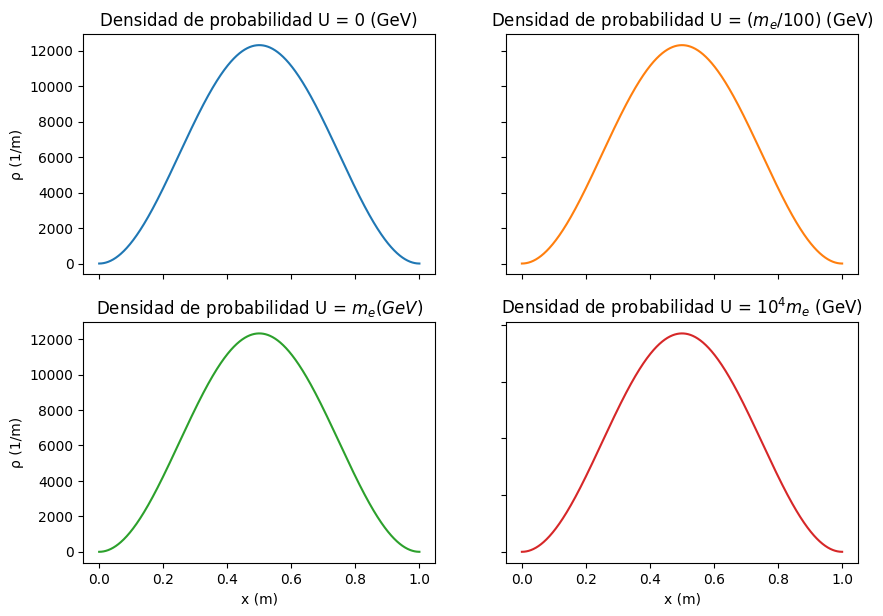

In [78]:
#Y similarmente graficamos las densidades:

densidad_1 = (psi_1**2*epsilon[0])/m_electron
densidad_2 = (psi_2**2*epsilon[1])/m_electron
densidad_3 = (psi_3**2*epsilon[2])/m_electron
densidad_4 = (psi_4**2*epsilon[3])/m_electron

fig, axs = plt.subplots(2, 2,figsize=(10,7),dpi=100)
axs[0, 0].plot(x_vector, densidad_1)
axs[0, 0].set_title('Densidad de probabilidad U = 0 (GeV)')
axs[0, 1].plot(x_vector, densidad_2, 'tab:orange')
axs[0, 1].set_title('Densidad de probabilidad U = $(m_e/100)$ (GeV)')
axs[1, 0].plot(x_vector, densidad_3, 'tab:green')
axs[1, 0].set_title('Densidad de probabilidad U = $m_e (GeV)$')
axs[1, 1].plot(x_vector, densidad_4, 'tab:red')
axs[1, 1].set_title('Densidad de probabilidad U = $10^4m_e$ (GeV)')

#Titulo de los ejes

for ax in axs.flat:
    ax.set(xlabel='x (m)', ylabel='\u03C1 (1/m)')

#Escondemos los titulos del eje x en los plot superiores y los del eje y para los plot de la derecha.
for ax in axs.flat:
    ax.label_outer()